<a href="https://colab.research.google.com/github/tarunc27/Netflix-Data_-Cleaning-Analysis-and-Visualization/blob/main/Netflix_Data__Cleaning%2C_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix Data_ Cleaning, Analysis and Visualization

Step 1: Set Up the Environment

In [ ]:
pip install pandas numpy matplotlib seaborn wordcloud

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Step 2: Load the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Internship/Netflix Data_ Cleaning, Analysis and Visualization/netflix1.csv")  # Update path if necessary

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())

First few rows of the dataset:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV A

Step 3: Data Cleaning

In [ ]:
# Step 3: Data Cleaning
print("\nMissing values in each column:")
print(data.isnull().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)
print("\nShape after removing duplicates:", data.shape)

# Drop rows with missing critical information (only for existing columns)
critical_columns = [col for col in ['director', 'country'] if col in data.columns]
if critical_columns:
    data.dropna(subset=critical_columns, inplace=True)
    print("\nShape after dropping missing values:", data.shape)
else:
    print("\nNo critical columns found for dropping missing values.")

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Verify data types
print("\nData types after cleaning:")
print(data.dtypes)


Missing values in each column:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Shape after removing duplicates: (8790, 10)

Shape after dropping missing values: (8790, 10)

Data types after cleaning:
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


Step 4: Exploratory Data Analysis (EDA) and Visualization

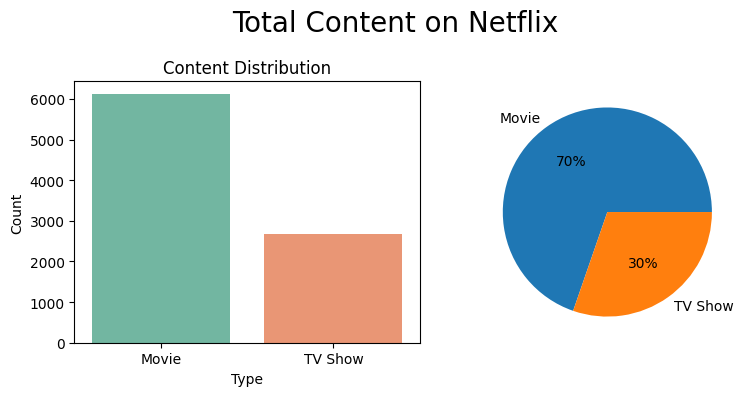

<ipython-input-9-05ed1a4039e3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


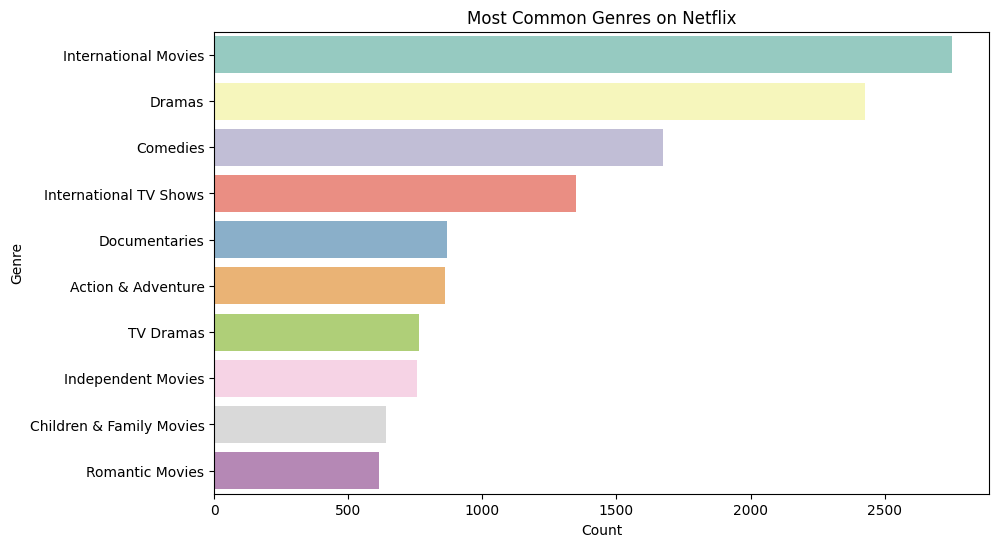

In [ ]:
# Content Type Distribution
freq = data['type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=data, x='type', hue='type', palette='Set2', ax=axes[0], legend=False)
axes[0].set_title('Content Distribution')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()

# Split 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



<ipython-input-10-17422df2999d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


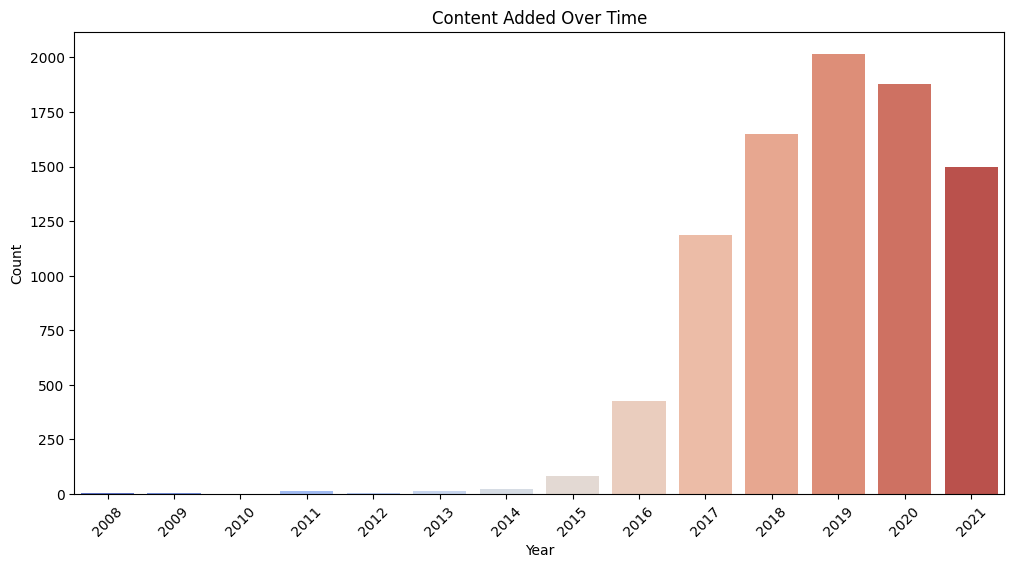

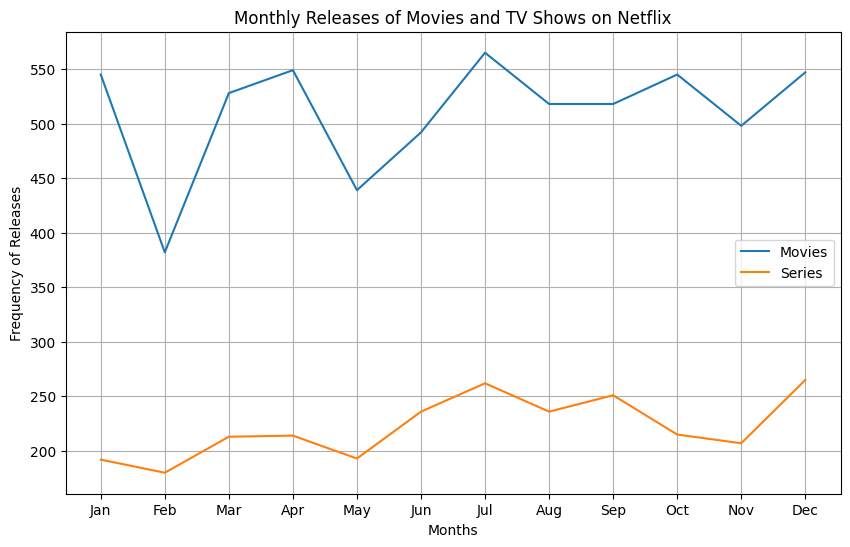

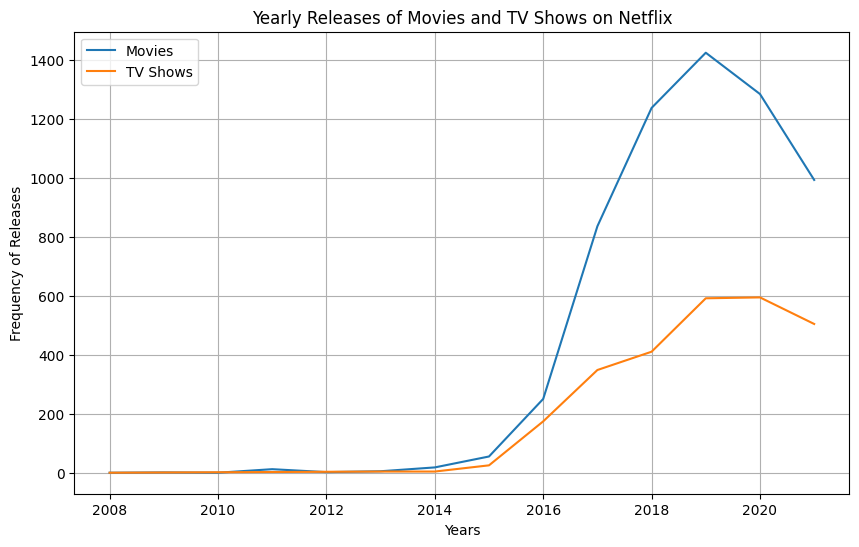

<ipython-input-10-17422df2999d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


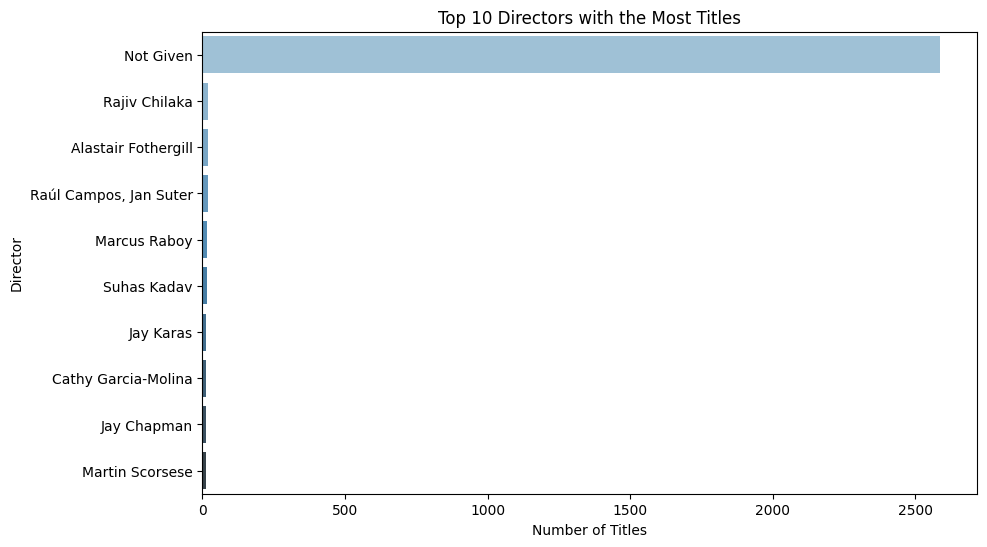

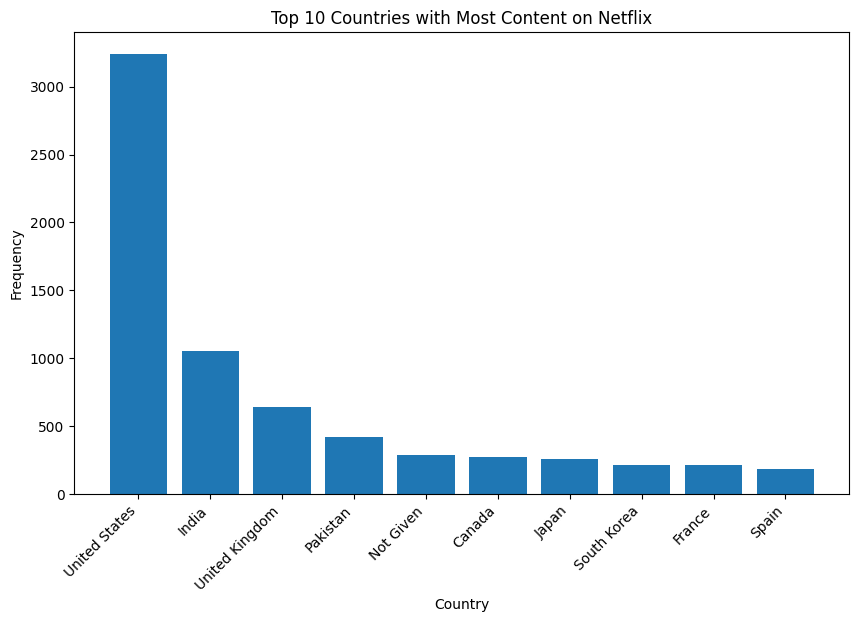

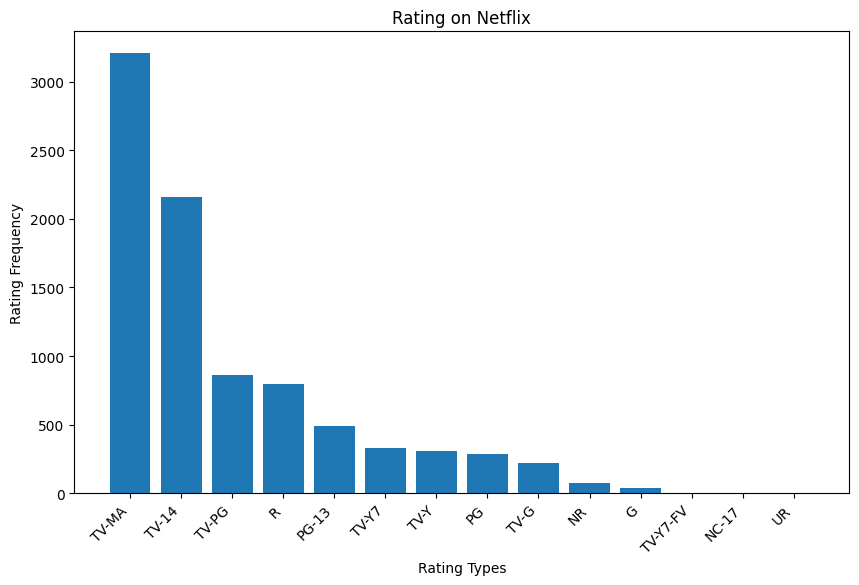

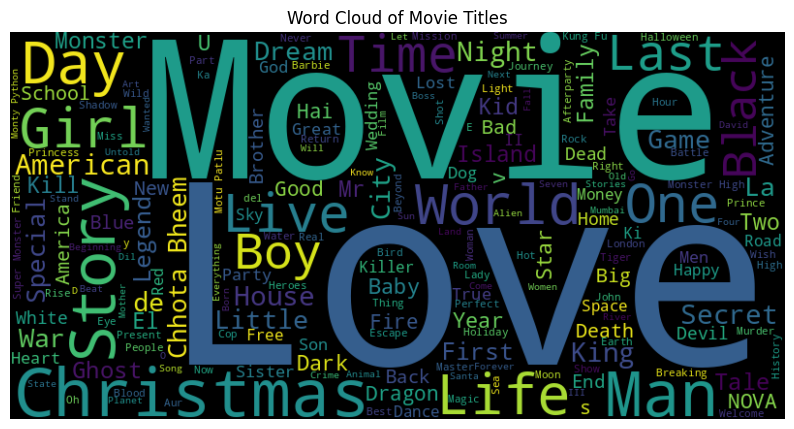

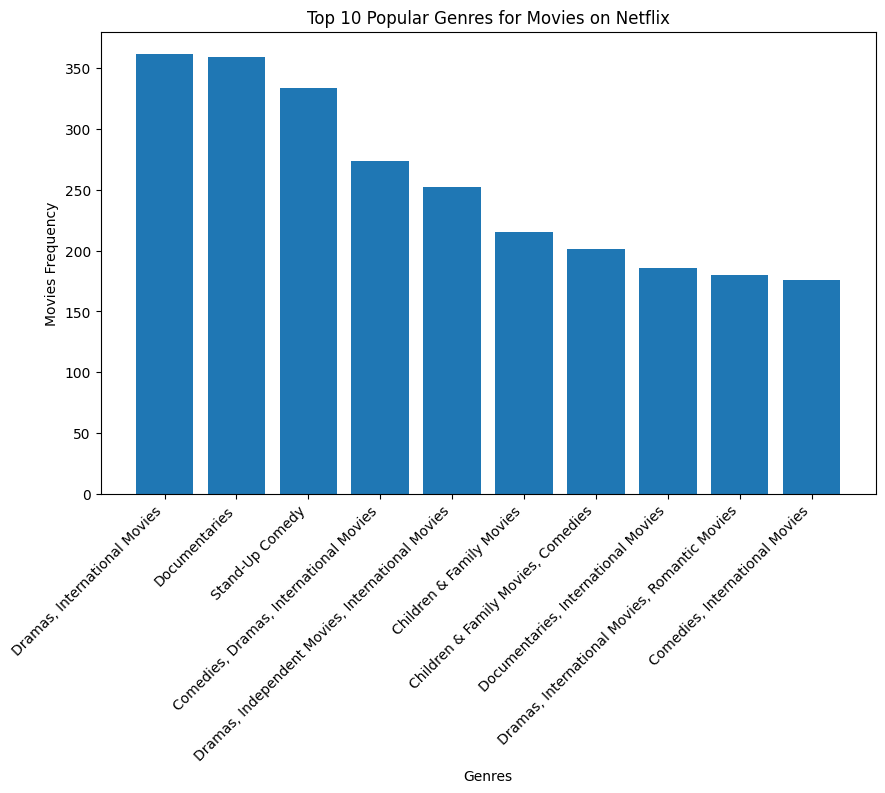

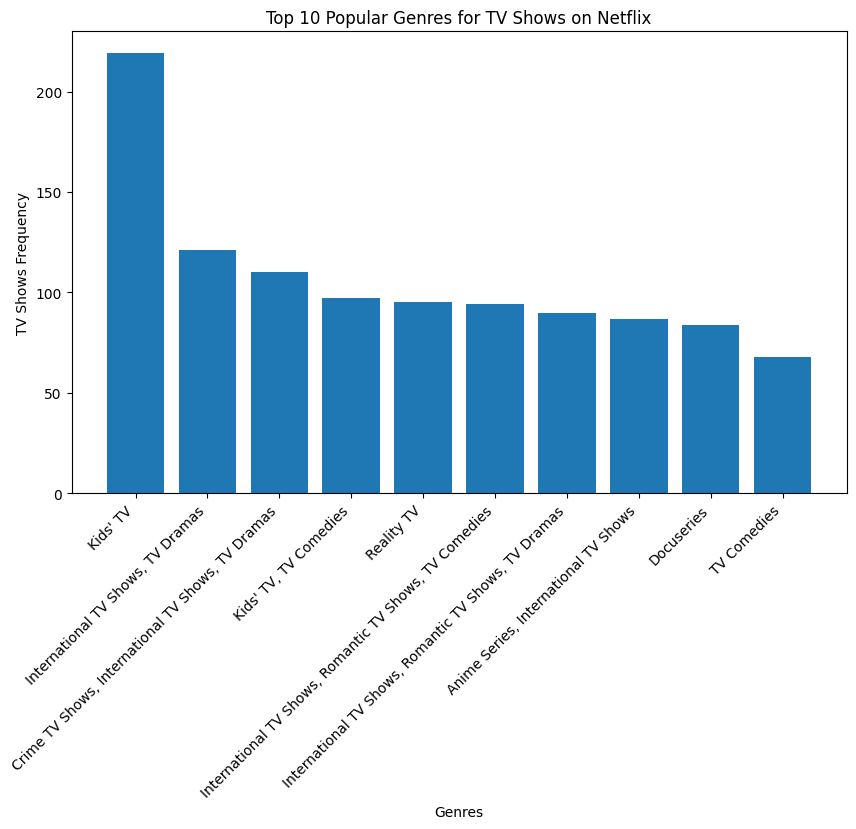

In [ ]:
# 4.3 Content Added Over Time
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4.4 Monthly Releases
monthly_movie_release = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xlabel('Months')
plt.ylabel('Frequency of Releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.title('Monthly Releases of Movies and TV Shows on Netflix')
plt.show()

# 4.5 Yearly Releases
yearly_movie_releases = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_series_releases = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel('Years')
plt.ylabel('Frequency of Releases')
plt.grid(True)
plt.title('Yearly Releases of Movies and TV Shows on Netflix')
plt.legend()
plt.show()

# 4.6 Top 10 Directors
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# 4.7 Top 10 Countries
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.show()

# 4.8 Rating Frequency
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.title('Rating on Netflix')
plt.show()

# 4.9 Word Cloud of Movie Titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

# 4.10 Top 10 Movie Genres
popular_movie_genre = data[data['type'] == 'Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.title('Top 10 Popular Genres for Movies on Netflix')
plt.show()

# 4.11 Top 10 TV Show Genres
popular_series_genre = data[data['type'] == 'TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('TV Shows Frequency')
plt.title('Top 10 Popular Genres for TV Shows on Netflix')
plt.show()

Step 5: Conclusion and Insights

In [ ]:
# Step 5: Conclusion and Insights
print("\nConclusion and Insights:")
print("1. Cleaned the data by handling missing values, removing duplicates, and converting data types.")
print("2. Explored content distribution, showing Movies dominate over TV Shows (~70% vs. 30%).")
print("3. Identified top genres (e.g., Dramas, Comedies), directors (e.g., Rajiv Chilaka), and countries (e.g., USA, India).")
print("4. Analyzed trends in content addition, with peaks in 2019–2020.")
print("5. Visualized rating frequencies (TV-MA most common) and created a word cloud for movie titles.")

# Step 6: Next Steps
print("\nNext Steps:")
print("1. Feature Engineering: Create new features like genre count per title or duration in minutes.")
print("2. Machine Learning: Build recommendation models or predict content trends.")
print("3. Advanced Visualization: Develop interactive dashboards using Tableau or Plotly.")


Conclusion and Insights:
1. Cleaned the data by handling missing values, removing duplicates, and converting data types.
2. Explored content distribution, showing Movies dominate over TV Shows (~70% vs. 30%).
3. Identified top genres (e.g., Dramas, Comedies), directors (e.g., Rajiv Chilaka), and countries (e.g., USA, India).
4. Analyzed trends in content addition, with peaks in 2019–2020.
5. Visualized rating frequencies (TV-MA most common) and created a word cloud for movie titles.

Next Steps:
1. Feature Engineering: Create new features like genre count per title or duration in minutes.
2. Machine Learning: Build recommendation models or predict content trends.
3. Advanced Visualization: Develop interactive dashboards using Tableau or Plotly.
